In [ ]:
!source ~/py3_kernel/bin/activate && python -V && pip install pandas

In [ ]:
!python3 -m pip install pandas


In [2]:
from platform import python_version

print(python_version())

3.7.0b4


In [3]:
# Import dataset

import pandas as pd

df=pd.read_csv('~/Machine_Learning_101/3_Suervised_Learning_Decision_Tree/playornot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
outlook        14 non-null object
temperature    14 non-null object
humidity       14 non-null object
windy          14 non-null bool
play           14 non-null object
dtypes: bool(1), object(4)
memory usage: 542.0+ bytes


In [4]:
df.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,No
1,sunny,hot,high,True,No
2,overcast,hot,high,False,Yes
3,rainy,mild,high,False,Yes
4,rainy,cool,normal,False,Yes


In [5]:
# Reshap data
y_mapdict = {'Yes': 1, 'No': 0}
y = df['play'].map(y_mapdict)
print (y.head())

windy_mapdict ={True:1,False:0}
windy = df['windy'].map(windy_mapdict)
print (windy.head())

humidity = pd.DataFrame()
humidity = pd.get_dummies(df['humidity'], prefix='humidity')
print (humidity.head())

temperature = pd.DataFrame()
temperature = pd.get_dummies(df['temperature'], prefix='temperature')
print (temperature.head())

outlook = pd.DataFrame()
outlook = pd.get_dummies(df['outlook'], prefix='outlook')
print (outlook.head())

0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int64
0    0
1    1
2    0
3    0
4    0
Name: windy, dtype: int64
   humidity_high  humidity_normal
0              1                0
1              1                0
2              1                0
3              1                0
4              0                1
   temperature_cool  temperature_hot  temperature_mild
0                 0                1                 0
1                 0                1                 0
2                 0                1                 0
3                 0                0                 1
4                 1                0                 0
   outlook_overcast  outlook_rainy  outlook_sunny
0                 0              0              1
1                 0              0              1
2                 1              0              0
3                 0              1              0
4                 0              1              0


In [13]:
full=pd.concat([windy,humidity,temperature,outlook,y])
full.corr()

,0,humidity_high,humidity_normal,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity_high,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
humidity_normal,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
outlook_overcast,NaN,NaN,NaN,1.000000,-0.471405,-0.471405,NaN,NaN,NaN
outlook_rainy,NaN,NaN,NaN,-0.471405,1.000000,-0.555556,NaN,NaN,NaN
outlook_sunny,NaN,NaN,NaN,-0.471405,-0.555556,1.000000,NaN,NaN,NaN
temperature_cool,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.400000,-0.547723
temperature_hot,NaN,NaN,NaN,NaN,NaN,NaN,-0.400000,1.000000,-0.547723
temperature_mild,NaN,NaN,NaN,NaN,NaN,NaN,-0.547723,-0.547723,1.000000


In [7]:
X=pd.concat([windy,humidity,temperature,outlook],axis=1)
Y=y

print (X.head())
print (Y[:5])

   windy  humidity_high  humidity_normal  temperature_cool  temperature_hot  \
0      0              1                0                 0                1   
1      1              1                0                 0                1   
2      0              1                0                 0                1   
3      0              1                0                 0                0   
4      0              0                1                 1                0   

   temperature_mild  outlook_overcast  outlook_rainy  outlook_sunny  
0                 0                 0              0              1  
1                 0                 0              0              1  
2                 0                 1              0              0  
3                 1                 0              1              0  
4                 0                 0              1              0  
0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int64


In [ ]:
# !source ~/py3_kernel/bin/activate && python -V && pip install sklearn

In [ ]:
# !source ~/py3_kernel/bin/activate && pip install graphviz

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=0.8)

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(train_x,train_y)
# Testing
predtest_y=model.predict(test_x)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predtest_y)

0.3333333333333333

In [14]:
import graphviz # doctest: +SKIP
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None) # doctest: +SKIP
graph = graphviz.Source(dot_data) # doctest: +SKIP
graph.render("tree") # doctest: +SKIP


dot_data = tree.export_graphviz(model, out_file=None, # doctest: +SKIP
                            feature_names=list(train_x),  # doctest: +SKIP
                            class_names='PlayOrNotplay',  # doctest: +SKIP
                            filled=True, rounded=True,  # doctest: +SKIP
                            special_characters=True)  # doctest: +SKIP
graph = graphviz.Source(dot_data)  # doctest: +SKIP
graph.view() # doctest: +SKIP


'Source.gv.pdf'

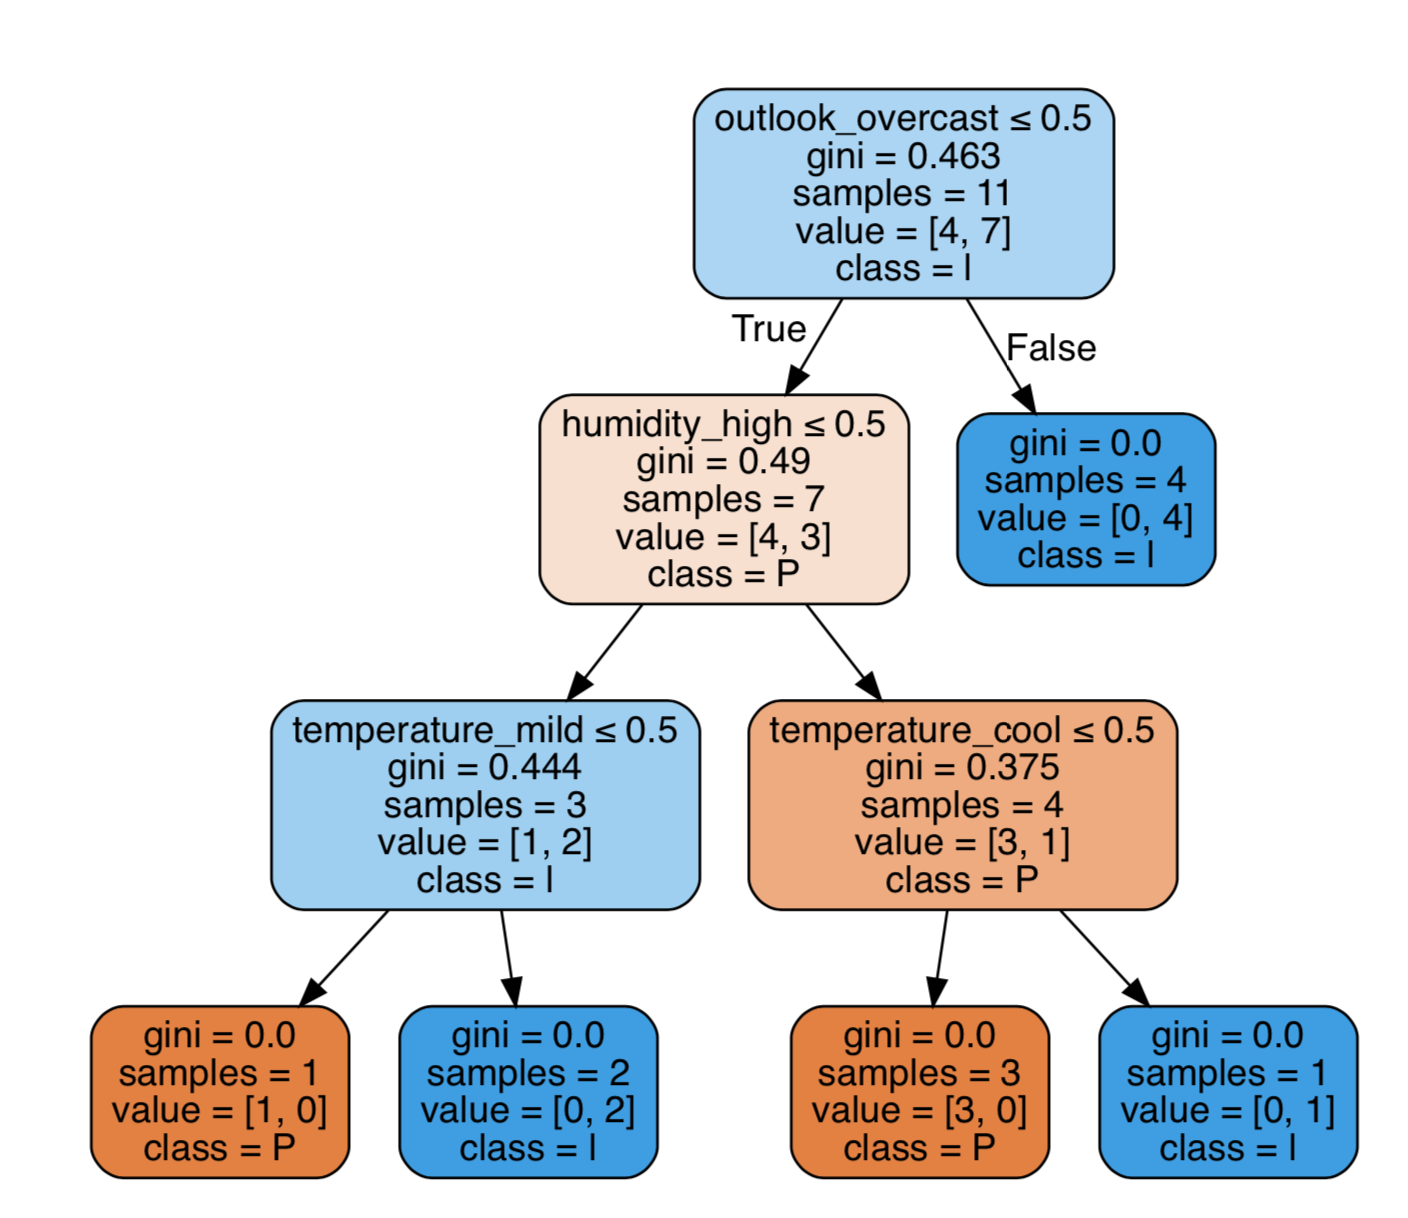

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,No
1,sunny,hot,high,True,No
2,overcast,hot,high,False,Yes
3,rainy,mild,high,False,Yes
4,rainy,cool,normal,False,Yes
5,rainy,cool,normal,True,No
6,overcast,cool,normal,True,Yes
7,sunny,mild,high,False,No
8,sunny,cool,high,False,Yes
9,rainy,mild,normal,False,Yes
